In [342]:
import numpy as np
import pandas as pd

X = pd.read_csv("us events ad_revenue filtered 03.02-07.02.CSV")
df = pd.DataFrame(X)

In [343]:
df

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_json,event_datetime,event_timestamp,event_receive_datetime,event_receive_timestamp,connection_type,operator_name,country_iso_code,city
0,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:28,1643994148,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk
1,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:45,1643994165,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk
2,JLkVacrzHY6,11,Google,Pixel 2,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-05 17:53:05,1644072785,2022-02-06 16:59:29,1644155969,wifi,Verizon,US,Charlotte
3,JMC6wG3cX0f,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""int"",""placement"":""next_level"",""vie...",2022-02-06 17:09:01,1644156541,2022-02-06 17:09:24,1644156564,wifi,T-Mobile,US,Cocoa
4,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:15:38,1644156938,2022-02-06 17:16:16,1644156976,cell,Verizon,US,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860074,JLSQY2nx1NQ,12,Samsung,Galaxy S21 Ultra 5G,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-03 08:29:27,1643866167,2022-02-03 08:29:37,1643866177,wifi,Verizon,US,Elmira
860075,JLKWwju79CA,12,Samsung,SM-G991U,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-03 02:12:51,1643843571,2022-02-03 02:14:48,1643843688,cell,Verizon,US,Cherry Hill
860076,JLKWwju79CA,12,Samsung,SM-G991U,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-03 02:13:06,1643843586,2022-02-03 02:14:48,1643843688,cell,Verizon,US,Cherry Hill
860077,JLKWwju79CA,12,Samsung,SM-G991U,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-03 02:13:17,1643843597,2022-02-03 02:14:48,1643843688,cell,Verizon,US,Cherry Hill


In [344]:
# извлекаю информацию о eCPM
v = np.arange(df.shape[0], dtype=float)
adt = ["" for x in range(df.shape[0])]
import json 
for i in range(0, df.shape[0]):
    ndict=json.loads(df.iat[i,7]) 
    v[i] = round(ndict["revenue"]*1000,3)
    ndict = json.loads(df["event_json"][i]) 
    adt[i] = ndict["ad_type"]


In [345]:
# создаю столбец eCPM и типа рекламы, добавляю его в дата фрейм
dv = pd.DataFrame(data = v, columns =["eCPM"])
df["eCPM"] = dv
dadt = pd.DataFrame(data = adt, columns =["ad_type"])
df["ad_type"] = dadt


In [346]:
df

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_json,event_datetime,event_timestamp,event_receive_datetime,event_receive_timestamp,connection_type,operator_name,country_iso_code,city,eCPM,ad_type
0,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:28,1643994148,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk,0.510,banner
1,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:45,1643994165,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk,0.510,banner
2,JLkVacrzHY6,11,Google,Pixel 2,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-05 17:53:05,1644072785,2022-02-06 16:59:29,1644155969,wifi,Verizon,US,Charlotte,2.386,banner
3,JMC6wG3cX0f,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""int"",""placement"":""next_level"",""vie...",2022-02-06 17:09:01,1644156541,2022-02-06 17:09:24,1644156564,wifi,T-Mobile,US,Cocoa,13.894,int
4,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:15:38,1644156938,2022-02-06 17:16:16,1644156976,cell,Verizon,US,NaN,6.828,banner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860074,JLSQY2nx1NQ,12,Samsung,Galaxy S21 Ultra 5G,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-03 08:29:27,1643866167,2022-02-03 08:29:37,1643866177,wifi,Verizon,US,Elmira,0.020,banner
860075,JLKWwju79CA,12,Samsung,SM-G991U,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-03 02:12:51,1643843571,2022-02-03 02:14:48,1643843688,cell,Verizon,US,Cherry Hill,6.740,banner
860076,JLKWwju79CA,12,Samsung,SM-G991U,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-03 02:13:06,1643843586,2022-02-03 02:14:48,1643843688,cell,Verizon,US,Cherry Hill,2.780,banner
860077,JLKWwju79CA,12,Samsung,SM-G991U,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-03 02:13:17,1643843597,2022-02-03 02:14:48,1643843688,cell,Verizon,US,Cherry Hill,2.780,banner


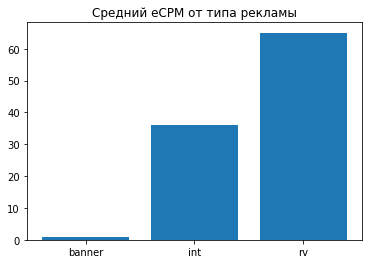

In [369]:
#cреднее eCPM по всем ос
o = pd.unique(df["ad_type"])
oe = np.arange(o.shape[0], dtype= float)
for i in range(0, o.shape[0]):
    oe[i] = df[df["ad_type"] == o[i]]["eCPM"].mean()

plt.bar(o,oe)
plt.title("Средний eCPM от типа рекламы")
plt.show()

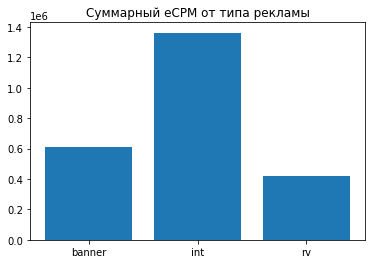

In [359]:
#cреднее eCPM по всем ос
o = pd.unique(df["ad_type"])
oe = np.arange(o.shape[0], dtype= float)
for i in range(0, o.shape[0]):
    oe[i] = df[df["ad_type"] == o[i]]["eCPM"].sum()

plt.bar(o,oe)
plt.title("Суммарный eCPM от типа рекламы")
plt.show()

Наиболее прибыльный вид рекламы в данном случае - полноэкранная реклама. 

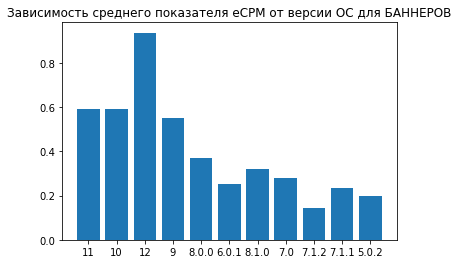

In [361]:
#среднее и суммарное для каждой конкретной ОС
import matplotlib.pyplot as plt

df1 = df[df["ad_type"] == 'banner']
o1 = pd.unique(df1["os_version"])
oe1 = np.arange(o1.shape[0], dtype= float)
for i in range(0, o1.shape[0]):
    oe1[i] = df1[df1["os_version"] == o1[i]]["eCPM"].mean()
    
plt.bar(o1,oe1)
plt.title("Зависимость среднего показателя eCPM от версии ОС для БАННЕРОВ")
plt.show()


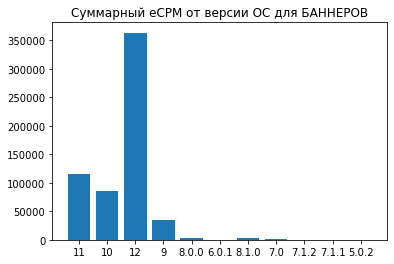

In [362]:
df1 = df[df["ad_type"] == 'banner']
o1 = pd.unique(df1["os_version"])
oe1 = np.arange(o1.shape[0], dtype= float)
for i in range(0, o1.shape[0]):
    oe1[i] = df1[df1["os_version"] == o1[i]]["eCPM"].sum()
    
plt.bar(o1,oe1)
plt.title("Суммарный eCPM от версии ОС для БАННЕРОВ")
plt.show()

Получается, что, и средний, и суммарный показатели eCPM максимальны на версии 12. Несмотря на то, что средний доход от версий ниже 9 довольно существенный, суммарный доход для этих версий незначителен.

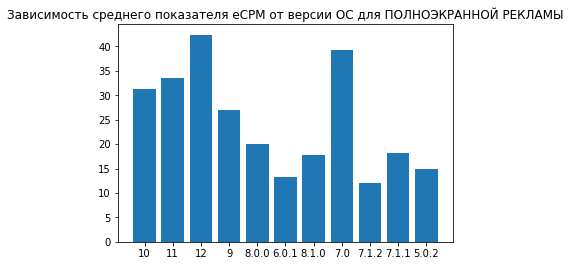

In [365]:
df2 = df[df["ad_type"] == 'int']
o2 = pd.unique(df2["os_version"])
oe2 = np.arange(o2.shape[0], dtype= float)
for i in range(0, o2.shape[0]):
    oe2[i] = df2[df2["os_version"] == o2[i]]["eCPM"].mean()

plt.bar(o2,oe2)
plt.title("Зависимость среднего показателя eCPM от версии ОС для ПОЛНОЭКРАННОЙ РЕКЛАМЫ")
plt.show()

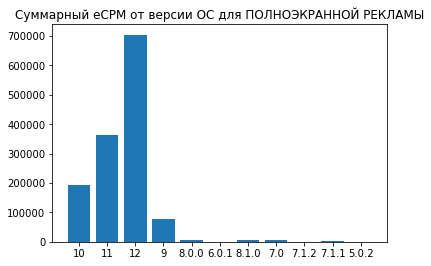

In [366]:
df2 = df[df["ad_type"] == 'int']
o2 = pd.unique(df2["os_version"])
oe2 = np.arange(o2.shape[0], dtype= float)
for i in range(0, o2.shape[0]):
    oe2[i] = df2[df2["os_version"] == o2[i]]["eCPM"].sum()

plt.bar(o2,oe2)
plt.title("Суммарный eCPM от версии ОС для ПОЛНОЭКРАННОЙ РЕКЛАМЫ")
plt.show()

Опять для версии 12 и средний, и суммарный eCPM максимален. Хотя средний показатель для версии 7.0 высок, суммарный показатель мал. 

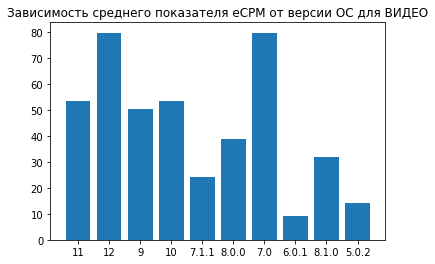

In [367]:
df3 = df[df["ad_type"] == 'rv']
o3 = pd.unique(df3["os_version"])
oe3 = np.arange(o3.shape[0], dtype= float)
for i in range(0, o3.shape[0]):
    oe3[i] = df3[df3["os_version"] == o3[i]]["eCPM"].mean()

plt.bar(o3,oe3)
plt.title("Зависимость среднего показателя eCPM от версии ОС для ВИДЕО")
plt.show()

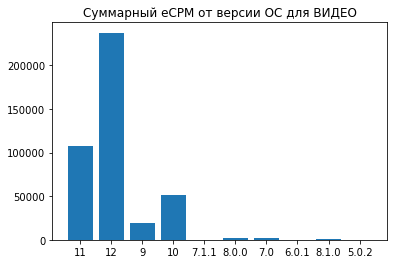

In [368]:
df3 = df[df["ad_type"] == 'rv']
o3 = pd.unique(df3["os_version"])
oe3 = np.arange(o3.shape[0], dtype= float)
for i in range(0, o3.shape[0]):
    oe3[i] = df3[df3["os_version"] == o3[i]]["eCPM"].sum()

plt.bar(o3,oe3)
plt.title("Суммарный eCPM от версии ОС для ВИДЕО")
plt.show()

Аналогичный результат. Максимальный доход был получен на версии 12 для полноэкранной рекламы. Он составил около 700000. Это выше чем суммарный доход для видео и для баннеров.

Теперь посчитаю среднее для городов.

In [383]:
# функция для поиска среднего eCPM по городам и типу рекламы 
def sr(k):    
    ddf = df[df["ad_type"] == k]
    ddf = ddf[ddf['city'].notna()]
    o = pd.unique(ddf["city"])
    oe = np.arange(o.shape[0], dtype= float)
    for i in range(0, o.shape[0]):
        oe[i] = ddf[ddf["city"] == o[i]]["eCPM"].mean()
        
    return o, oe        

# Средний eCPM по городам для разных типов рекламы

In [384]:
o, oe = sr('banner')
eCPM1 = pd.DataFrame(o)
eCPM1["eCPM Баннер"] = oe
sortCPM1 = eCPM1.sort_values(by='eCPM Баннер', ascending=False) 
print(sortCPM1)


                 0  eCPM Баннер
621      La Crosse    19.326500
763  Mountain View    12.750000
300          Huron     7.575000
698         Oxnard     7.519000
430  Lawrenceville     7.519000
..             ...          ...
673   Bell Gardens     0.041000
780          Vista     0.040454
103         Malden     0.037920
371       Anderson     0.031000
590     Canonsburg     0.029333

[856 rows x 2 columns]


In [385]:
o, oe = sr('int')
eCPM2 = pd.DataFrame(o)
eCPM2["eCPM Полноэкранная реклама"] = oe
sortCPM2 = eCPM2.sort_values(by='eCPM Полноэкранная реклама', ascending=False) 
print(sortCPM2)

                     0  eCPM Полноэкранная реклама
385       Madisonville                  437.040000
657          La Crosse                  415.159333
291       Rohnert Park                  297.600000
110             Nashua                  252.555533
851            Norwood                  245.529200
..                 ...                         ...
491  Fort Walton Beach                    2.960250
118              Ocala                    2.927000
207        Kailua-Kona                    2.910316
849          Chantilly                    2.891000
673       Lincoln City                    2.750500

[869 rows x 2 columns]


In [386]:
o, oe = sr('rv')
eCPM3 = pd.DataFrame(o)
eCPM3["eCPM Видео"] = oe
sortCPM3 = eCPM3.sort_values(by='eCPM Видео', ascending=False) 
print(sortCPM3)

                     0  eCPM Видео
100        East Peoria  808.295000
428            Norwood  597.984000
130        Idaho Falls  366.840000
402         Valparaiso  318.750000
113        Rocky Mount  290.112000
..                 ...         ...
348          Uniontown    9.084000
382          Bethlehem    7.974235
321          Oak Creek    4.178667
206  Fort Walton Beach    4.075000
446              Utica    3.339500

[454 rows x 2 columns]


# Теперь суммарное eCPM

In [387]:
# функция для поиска суммарного eCPM по городам и типу рекламы 
def su(k):    
    ddf = df[df["ad_type"] == k]
    ddf = ddf[ddf['city'].notna()]
    o = pd.unique(ddf["city"])
    oe = np.arange(o.shape[0], dtype= float)
    for i in range(0, o.shape[0]):
        oe[i] = ddf[ddf["city"] == o[i]]["eCPM"].sum()
        
    return o, oe   

# Суммарный eCPM по городам для баннеров

In [388]:
o, oe = su('banner')
SeCPM1 = pd.DataFrame(o)
SeCPM1["eCPM Баннер"] = oe
SsortCPM1 = SeCPM1.sort_values(by='eCPM Баннер', ascending=False) 
print(SsortCPM1)


                0  eCPM Баннер
16       New York    12707.758
10   Indianapolis     9788.361
66        Spokane     8862.272
44        Houston     8664.560
64    Minneapolis     7628.660
..            ...          ...
616  Strongsville        0.086
716      Hartford        0.085
574   Federal Way        0.055
743      Waukesha        0.045
371      Anderson        0.031

[856 rows x 2 columns]


# Суммарный eCPM по городам для полноэкранной рекламы

In [389]:
o, oe = su('int')
SeCPM2 = pd.DataFrame(o)
SeCPM2["eCPM Полноэкранная реклама"] = oe
SsortCPM2 = SeCPM2.sort_values(by='eCPM Полноэкранная реклама', ascending=False) 
print(SsortCPM2)

                      0  eCPM Полноэкранная реклама
12             New York                   25674.262
52         Indianapolis                   21534.424
105           Cleveland                   18112.860
35          Minneapolis                   17286.300
25            Charlotte                   14940.730
..                  ...                         ...
531     Hoffman Estates                       8.474
202  Jacksonville Beach                       7.987
605         Federal Way                       5.540
118               Ocala                       2.927
849           Chantilly                       2.891

[869 rows x 2 columns]


# Суммарный eCPM по городам для видео

In [390]:
o, oe = sr('rv')
SeCPM3 = pd.DataFrame(o)
SeCPM3["eCPM Видео"] = oe
SsortCPM3 = SeCPM3.sort_values(by='eCPM Видео', ascending=False) 
print(SsortCPM3)

                     0  eCPM Видео
100        East Peoria  808.295000
428            Norwood  597.984000
130        Idaho Falls  366.840000
402         Valparaiso  318.750000
113        Rocky Mount  290.112000
..                 ...         ...
348          Uniontown    9.084000
382          Bethlehem    7.974235
321          Oak Creek    4.178667
206  Fort Walton Beach    4.075000
446              Utica    3.339500

[454 rows x 2 columns]


Как и в случае с версиями ОС, полноэкранная реклама прибыльнее. Наиболее прибыльным городом оказался Нью-Йорк. 

Text(0.5, 1.0, 'Распределение eCPM')

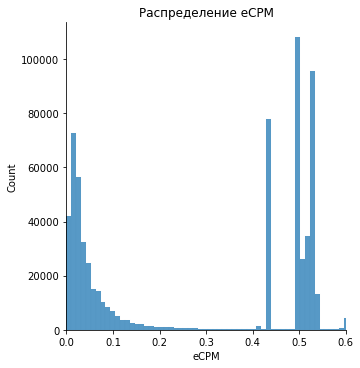

In [399]:
import seaborn as sns

data = df1
sns.displot(x='eCPM', data = data)
plt.xlim([0,0.6])
plt.title("Распределение eCPM")

Вывод. В ходе исследования было выяснено, что полноэкранная реклама наиболее прибыльный вид рекламы. Самый прибыльный город - Нью-Йорк. Самая прибыьная версия ОС - 12.